In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy.stats import chi2
import pickle
from multiprocessing import Pool
from subprocess import call
#os.chdir("../../")
#sys.path.append("./src/data")
#sys.path.append("./src/events")
#sys.path.append("./src/probability")

sys.path.append("../../")
from src.data.IC.importer import *
from src.data.IC.processer import *
from src.events.IC.event_processing import *
from src.events.IC.main import sim_events
from src.probability.functions import nufit_params_nsi
from src.plotter import P_over_E_parameter, oscillogram, nsi_oscillogram
from src.events.DC.event_processing import list_of_params_nsi, get_param_list
from src.plotter import savethesis

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.dpi"] = 100
matplotlib.rc("text", usetex=True)
matplotlib.rc("text.latex", preamble=r"\usepackage{amsmath}")
np.set_printoptions(linewidth=200)


/Users/sjoborg/thesis/.venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [2]:
IC_range = np.logspace(np.log10(500), 4, 50)
DC_range = np.logspace(np.log10(5.6), np.log10(56), 50)
all_range = np.logspace(np.log10(5.6), 4, 500)

ett_range = [5e-2, 0]
emt_range = [2e-2, 0]
ee_range = [2e-1, 0]
params = nufit_params_nsi.copy()
ett_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], ett_range, [0], [0], [0]
)
emt_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], [0], emt_range, [0], [0]
)
eem_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], [0], [0], ee_range, [0]
)
eet_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], [0], [0], [0], ee_range
)
both_params = list_of_params_nsi(
    params, [params["dm_31"]], [params["theta_23"]], ett_range, emt_range, [0], [0]
)
zenith = -1

In [3]:
Pamam_ett_IC = P_over_E_parameter(
    "m", ett_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pamam_emt_IC = P_over_E_parameter(
    "m", emt_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

Pmm_ett_IC = P_over_E_parameter(
    "m", ett_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pmm_emt_IC = P_over_E_parameter(
    "m", emt_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

Pamam_eem_IC = P_over_E_parameter(
    "m", eem_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pamam_eet_IC = P_over_E_parameter(
    "m", eet_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

Pmm_eem_IC = P_over_E_parameter(
    "m", eem_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(ett_range), -1)
Pmm_eet_IC = P_over_E_parameter(
    "m", eet_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 1, :].reshape(len(emt_range), -1)

In [4]:
Paeae_eem_IC = P_over_E_parameter(
    "e", eem_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 0, :].reshape(len(ett_range), -1)
Paeae_eet_IC = P_over_E_parameter(
    "e", eet_params, E=all_range, ndim=3, nsi=True, anti=True, zenith=zenith
)[:, 0, :].reshape(len(emt_range), -1)

Pee_eem_IC = P_over_E_parameter(
    "e", eem_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 0, :].reshape(len(ett_range), -1)
Pee_eet_IC = P_over_E_parameter(
    "e", eet_params, E=all_range, ndim=3, nsi=True, anti=False, zenith=zenith
)[:, 0, :].reshape(len(emt_range), -1)

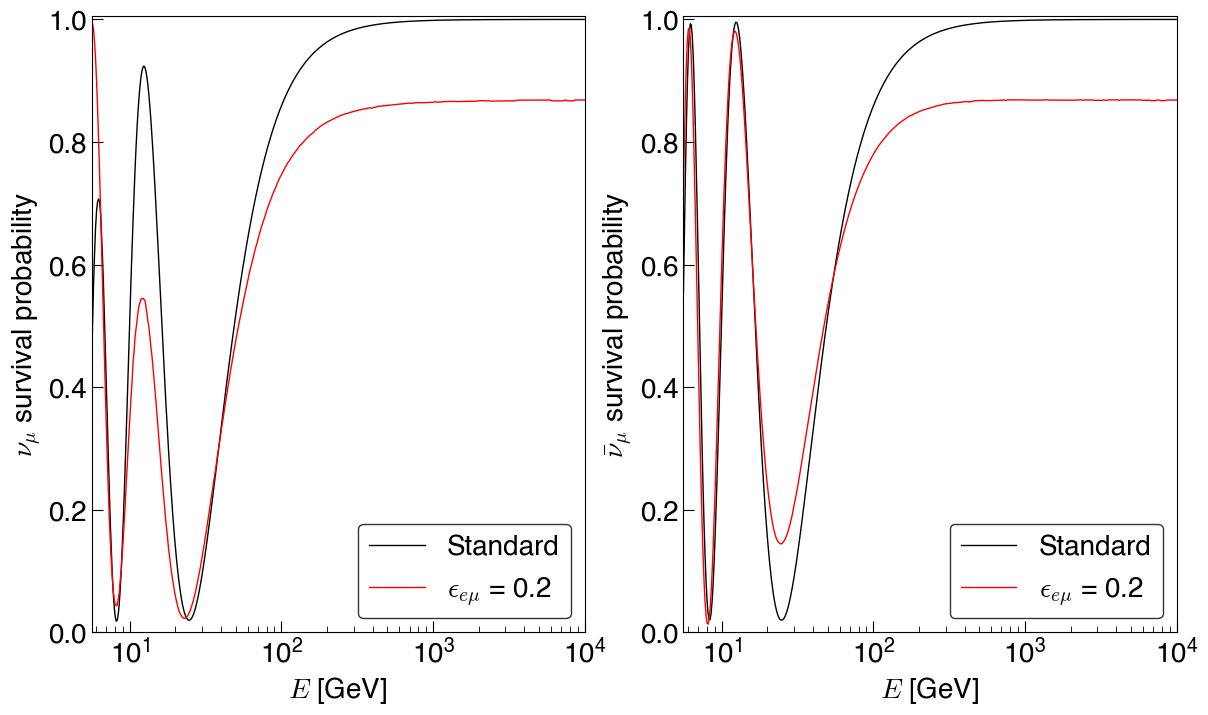

In [8]:
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax = ax.flatten()
labels = ["Standard", r"$\epsilon_{e\mu}$ = 0.2"]

ax[0].plot(all_range, Pmm_eem_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[0].plot(all_range, Pmm_eem_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)
ax[1].plot(all_range, Pamam_eem_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[1].plot(all_range, Pamam_eem_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))

leg = ax[0].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")
leg = ax[1].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_\mu$ survival probability", fontsize=20)
ax[1].set_ylabel(r"$\bar{\nu}_\mu$ survival probability", fontsize=20)
ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)
ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None

plt.show()

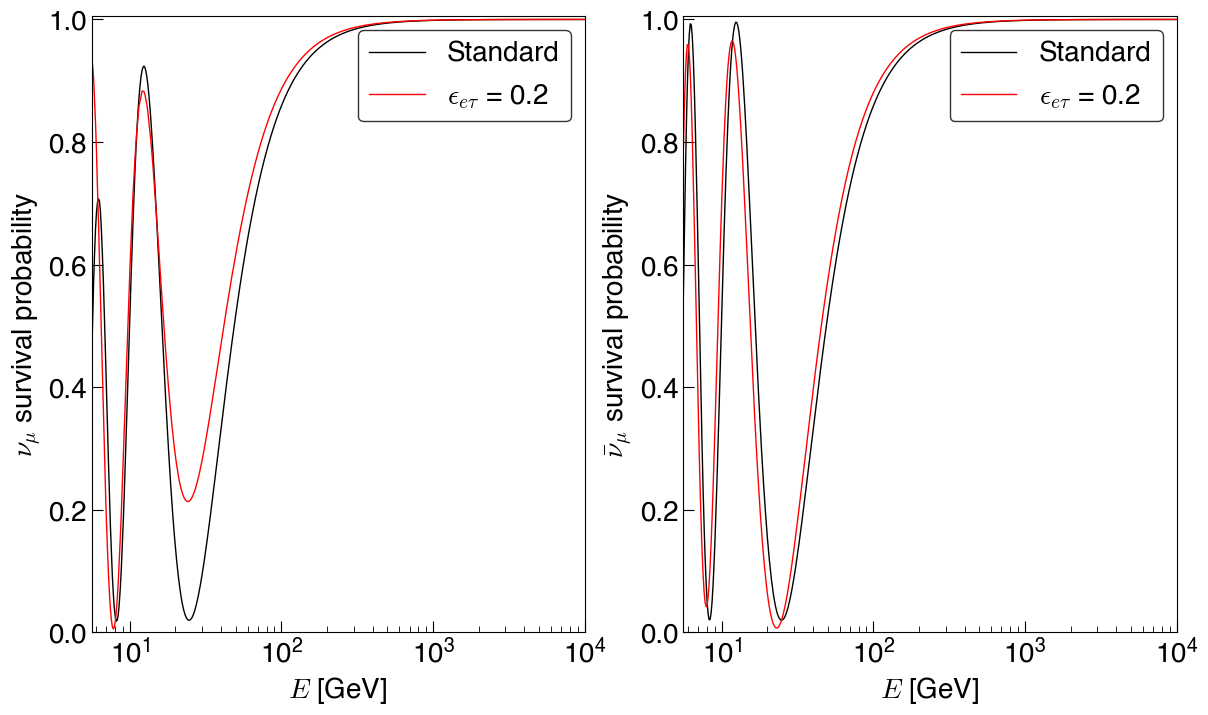

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax = ax.flatten()
labels = ["Standard", r"$\epsilon_{e\tau}$ = 0.2"]

ax[0].plot(all_range, Pmm_eet_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[0].plot(all_range, Pmm_eet_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)
ax[1].plot(all_range, Pamam_eet_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[1].plot(all_range, Pamam_eet_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))

leg = ax[0].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")
leg = ax[1].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_\mu$ survival probability", fontsize=20)
ax[1].set_ylabel(r"$\bar{\nu}_\mu$ survival probability", fontsize=20)
ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)
ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None
#savethesis(fig, "eet_probs")

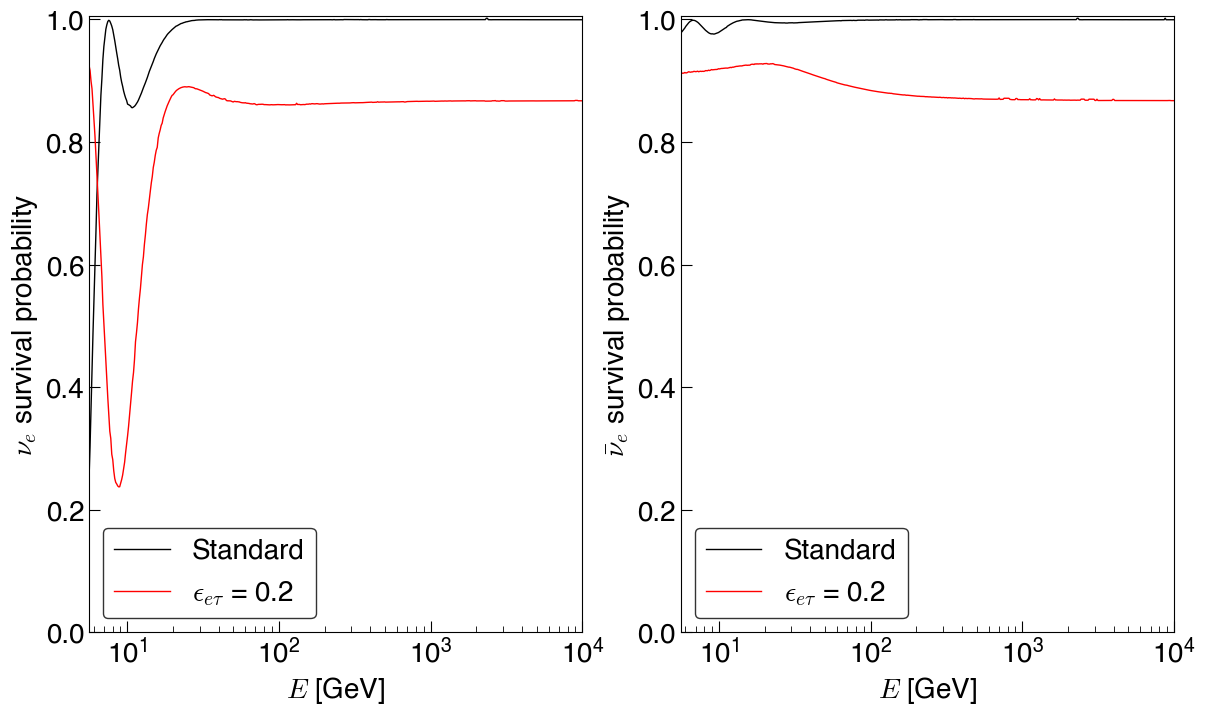

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax = ax.flatten()
labels = ["Standard", r"$\epsilon_{e\tau}$ = 0.2"]

ax[0].plot(all_range, Pee_eet_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[0].plot(all_range, Pee_eet_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)
ax[1].plot(all_range, Paeae_eet_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[1].plot(all_range, Paeae_eet_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))

leg = ax[0].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")
leg = ax[1].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_e$ survival probability", fontsize=20)
ax[1].set_ylabel(r"$\bar{\nu}_e$ survival probability", fontsize=20)
ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)
ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None
#savethesis(fig, "Pee_eet_probs")

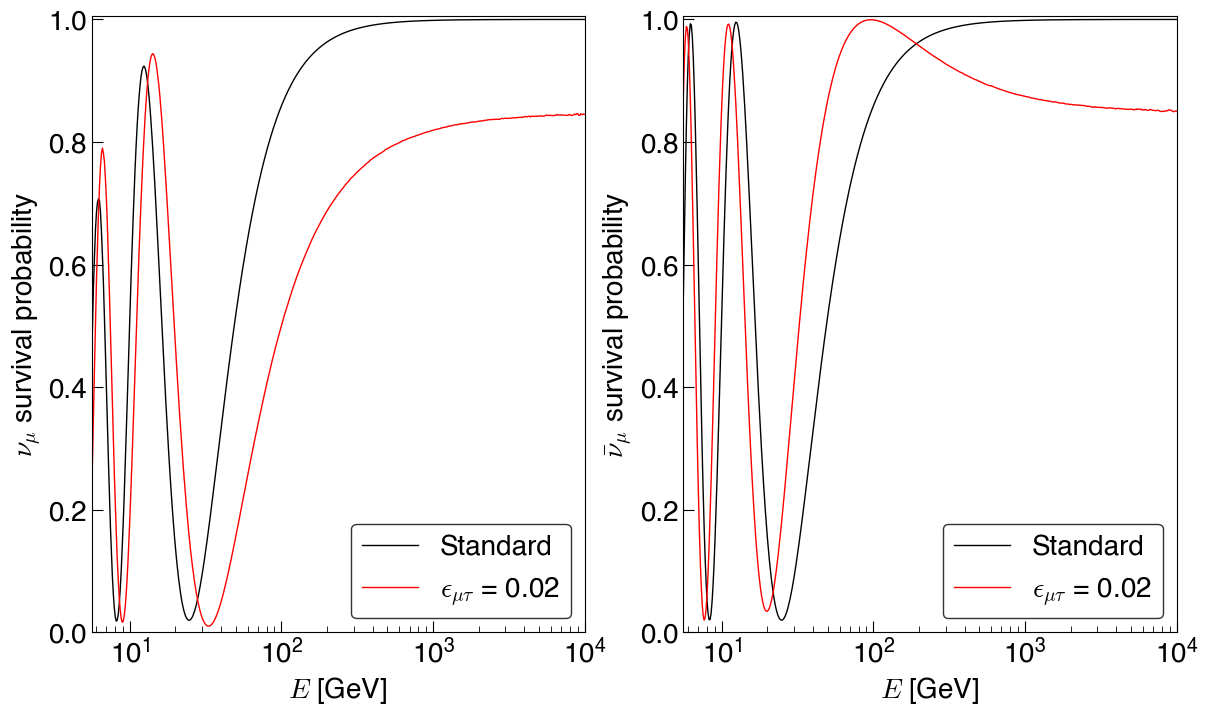

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax = ax.flatten()
labels = ["Standard", r"$\epsilon_{\mu\tau}$ = 0.02"]

ax[0].plot(all_range, Pmm_emt_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[0].plot(all_range, Pmm_emt_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)
ax[1].plot(all_range, Pamam_emt_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[1].plot(all_range, Pamam_emt_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))

leg = ax[0].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")
leg = ax[1].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_\mu$ survival probability", fontsize=20)
ax[1].set_ylabel(r"$\bar{\nu}_\mu$ survival probability", fontsize=20)
ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)
ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None
#savethesis(fig, "Pmm_emt_probs")

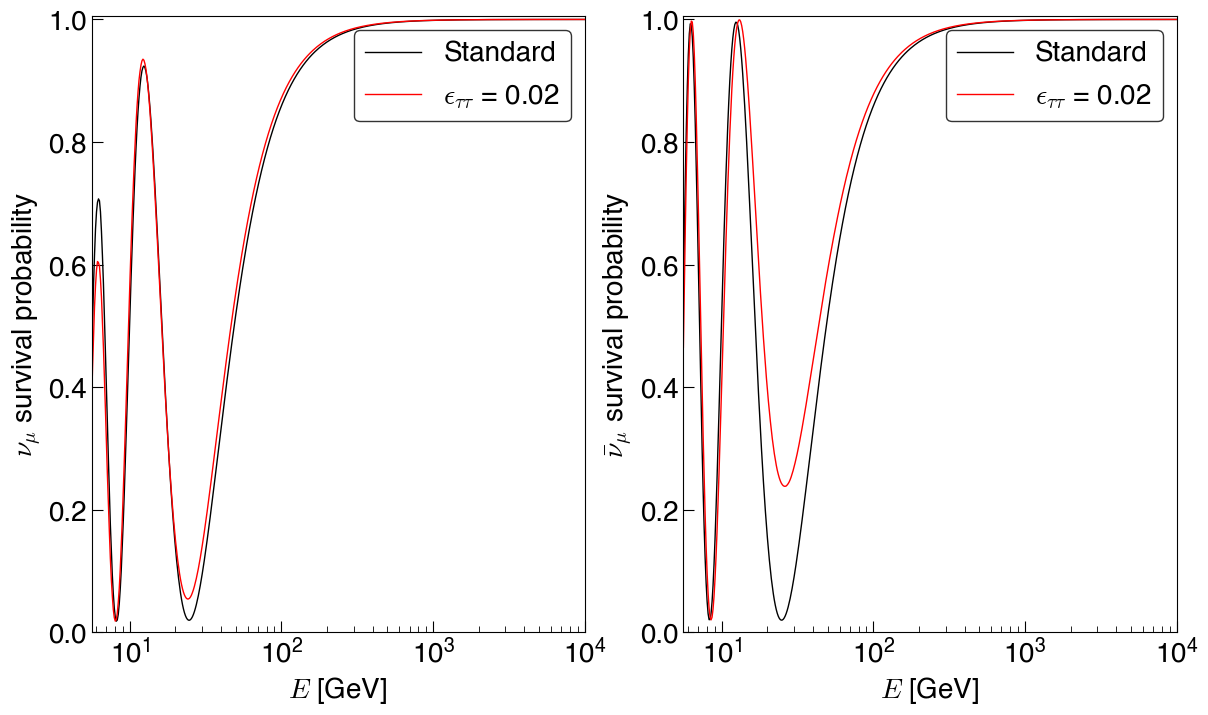

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))
ax = ax.flatten()
labels = ["Standard", r"$\epsilon_{\tau\tau}$ = 0.02"]

ax[0].plot(all_range, Pmm_ett_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[0].plot(all_range, Pmm_ett_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)
ax[1].plot(all_range, Pamam_ett_IC[1, :], ls="solid", label=labels[0], c="black", lw=1)
ax[1].plot(all_range, Pamam_ett_IC[0, :], ls="solid", label=labels[1], c="red", lw=1)

ax[0].set_xscale("log")
ax[1].set_xscale("log")


ax[0].set_ylim((0, 1.005))
ax[1].set_ylim((0, 1.005))
ax[0].set_xlim((5.6, 10000))
ax[1].set_xlim((5.6, 10000))

leg = ax[0].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")
leg = ax[1].legend(fontsize=20)
leg.get_frame().set_edgecolor("k")

ax[0].set_ylabel(r"$\nu_\mu$ survival probability", fontsize=20)
ax[1].set_ylabel(r"$\bar{\nu}_\mu$ survival probability", fontsize=20)
ax[0].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[1].set_xlabel(r"$E$ [GeV]", fontsize=20)
ax[0].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[0].tick_params(which="minor", length=4)
ax[1].tick_params(axis="both", direction="in", which="both", length=8, labelsize=20)
ax[1].tick_params(which="minor", length=4)
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args: None
#savethesis(fig, "Pmm_ett_probs")